In [18]:
from jax import numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = jnp.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = jnp.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [3]:
def f(x, phi0, phi1):
    y = phi0 + phi1 * x
    return y

In [5]:
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, ')
    ax.set_ylabel('Output, ')
    # Draw line
    x_line = jnp.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

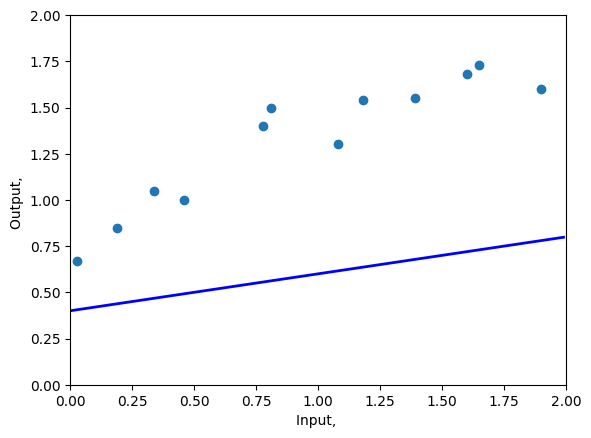

In [6]:
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)


In [7]:
def compute_loss(x,y,phi0,phi1):
    loss = 0
    for i in range(len(x)):
        y_hat = f(x[i],phi0,phi1)
        loss = loss + (y_hat - y[i])**2
    return loss

In [8]:
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 7.07, Ground truth =7.07


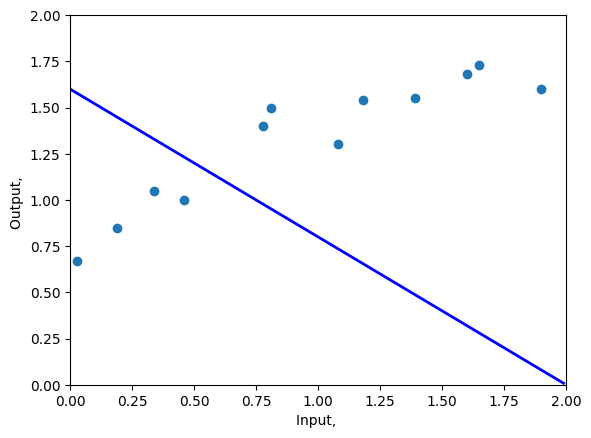

Your Loss = 10.28, Ground truth =10.28


In [9]:
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')


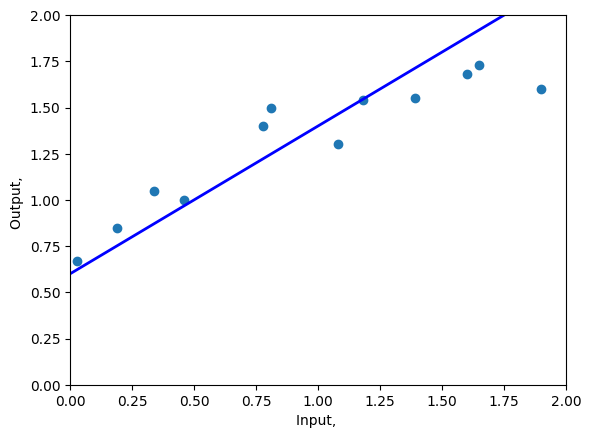

Your Loss = 0.54


In [16]:
phi0 = 0.60 ; phi1 =0.8

plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')

In [19]:
phi0_mesh, phi1_mesh = jnp.meshgrid(jnp.arange(0.0,2.0,0.02), jnp.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = jnp.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses = all_losses.at[indices].set(compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices]))


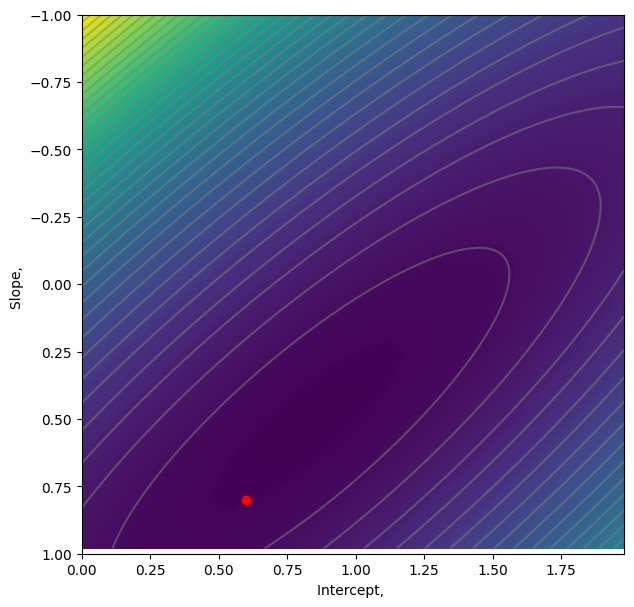

In [20]:
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, ')
ax.set_ylabel(r'Slope, ')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()
